핸즈온 9장 비지도학습 p. 299-345

In [7]:
import warnings
warnings.filterwarnings(action='ignore')

- **군집**: 비슷한 샘플을 클러스로 모음. 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소 등에 사용할 수 있음.

- **이상치 탐지**: 정상 데이터가 어떻게 보인는지를 학습함. 다음으로 비정상 샘플을 감지하는데 사용함. ex. 결함 제품 감지, 시계열 데이터에서 새로운 트렌드 찾기

- **밀도 추정**: 데이터셋 생성 확률 과정의 확률 밀도 함수(PDF)를 추정함. 이상치 탐지에 널리 사용됨. 밀도가 매우 낮은 영역에 놓은 샘플이 이상치일 가능성이 높음. 

## 9.1 군집

군집

-  비슷한 샘플을 구별해 하나의 클러스터 또는 비슷한 샘플의 그룹으로 할당하는 작업

- 분류와 달리 군집은 비지도 학습

- 고객 분류, 데이터 분석, 차원 축소 기법, 이상치 탐지, 준지도 학습, 검색 엔진, 이미지 분할에 활용됨.


In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

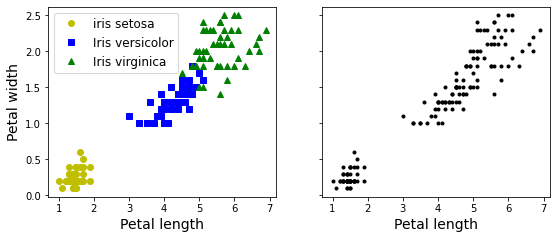

In [ ]:
# 분류(지도학습) vs. 군집(비지도학습)
import matplotlib.pyplot as plt
plt.figure(figsize=(9,3.5))
plt.subplot(121)
plt.plot(X[y==0,2], X[y==0,3],'yo',label='iris setosa')
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:,2],X[:,3],c='k', marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)
plt.show()

### 9.1.1 K-평균

K-평균: 각 클러스터의 중심을 찾고 가장 가까운 클러스터에 샘플을 할당함.

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]]
)
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

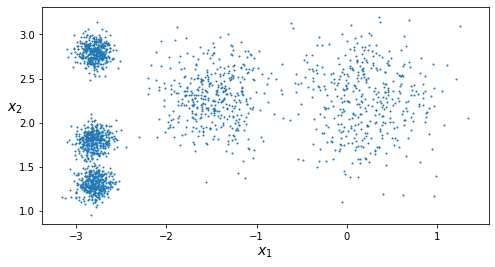

In [ ]:
def plot_clusters(X, y =None):
  plt.scatter(X[:,0], X[:,1], c=y, s=1)
  plt.xlabel("$x_1$",fontsize=14)
  plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
k = 5 # 알고리즘이 찾을 클러스터 개수
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [ ]:
y_pred

array([4, 2, 3, ..., 1, 3, 2], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

In [ ]:
# 특정 포인트를 중심으로 모인 센트로이드 5개 찾기
kmeans.cluster_centers_

array([[-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.80037642,  1.30082566]])

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([3, 3, 1, 1], dtype=int32)

 k-평균의 클러스터 결정 경계(보로노이 다이어그램)


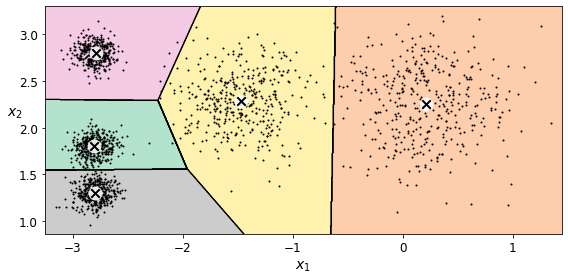

- k평균 알고리즘은 클러스터의 크기가 많이 다르면 잘 작동하지 않음. 샘플을 클러스터에 할당할 때 센트로이드까지 거리를 고려하는 것이 전부이기 때문.

- 하드 군집: 샘플을 하나의 클러스터에 할당하는 것

- 소프트 군집: 클러스터마다 샘플에 점수를 부여. 점수는 샘플과 센트로이드 사이의 거리.

In [ ]:
# kmeans.transform(): 샘플과 각 센트로이드 사이의 거리
kmeans.transform(X_new)

array([[1.49439034, 0.32995317, 2.81093633, 2.9042344 , 2.88633901],
       [4.4759332 , 2.80290755, 5.80730058, 5.84739223, 5.84236351],
       [1.69136631, 3.29399768, 1.21475352, 0.29040966, 1.71086031],
       [1.54808703, 3.21806371, 0.72581411, 0.36159148, 1.21567622]])

**K-평균 알고리즘**

1. 무작위로 k개의 샘플을 뽑아 그 위치를 센트로이드로 선정

2. 샘플에 레이블을 할당하고 센트로이드를 업데이트

3. 센트로이드에 변화가 없을 때까지 계속 함.

- 알고리즘의 수렴성은 보장됨. (무한히 반복X) 

- 하지만, 지역 최적점으로 수렴할 수도 있음. (센트로이드를 어떻게 초기화하는지에 따라 달라짐.)

**센트로이드 초기화 방법**

- 다른 군집 알고리즘을 먼저 실행하는 등의 방법을 이용하여 센트로이드 위치를 근사하게 알 수 있다면 init 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고 n_init를 1로 설정할 수 있음.

- 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하여 가장 좋은 것 선택

  n_init의 기본값은 10

- 성능 평가: **이너셔** - 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리

In [ ]:
good_init = np.array([[-3,3],[-3,2],[-3,1],[-1,2],[0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [ ]:
# 이너셔
kmeans.inertia_

211.5985372581684

In [ ]:
# score: 이너셔의 음수값 (예측기가 좋을수록 score이 크도록 음수로 표현)
kmeans.score(X)

-211.59853725816836

**k-평균++ 알고리즘**

1. 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $c^{(1)} $을 선택

2. $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$의 확률로 샘플 $\mathbf{x}_i$를 새로운 센트로이드 $c_i$로 선택. 여기에서 $D(\mathbf{x}_i)$는 샘플 $\mathbf{x}_i$에서 이미 선택된 가장 가까운 센트로이드까지 거리입니다. 이 확률 분포는 이미 선택한 센트로이드에서 멀리 떨어진 샘플을 센트로이드로 선택할 가능성을 높입니다.

3. $k$ 개의 센트로이드를 선택할 때까지 이전 단계를 반복

- KMeans 클래스는 기본적으로 이 초기화 방법을 사용함.


**미니배치 k-평균**

MiniBatchKMeans

-전체 데이터셋을 사용해 반복하지 않고 각 반복마다 미니배치를 사용해 센트로이드를 조금씩 이동함. 

- 속도가 3~4배 빠르고, 메모리에 들어가지 않는 대량 데이터셋에 적용 가능

- 클러스터의 개수가 증가하면 일반적인 k-평균 알고리즘보다 이너셔는 일반적으로 나쁨.

In [ ]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

In [ ]:
minibatch_kmeans.inertia_

223.23831342585035

**최적의 클러스터 개수 찾기**

- **실루엣 계수**: (b-a)/max(a,b)

  (a: 동일한 클러스터에 있는 다른 샘플까지의 평균 거리(클러스터 내부의 평균 거리)

  b: 가장 가까운 클러스터까지 평균 거리)

- 실루엣 계수가 1에 가까우면 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와는 멀리 떨어져 있음을 의미

- 실루엣 계수가 0에 가까우면 클러스터 경계에 위치함을 의미

- 실루엣 계수가 -1에 가까우면 샘플이 잘못된 클러스터에 할당되었다는 의미

- 실루엣 점수: 실루엣 계수의 평균

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X,kmeans.labels_)

0.655517642572828

In [ ]:
# 클러스터 개수에 따라 이너셔 비교
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

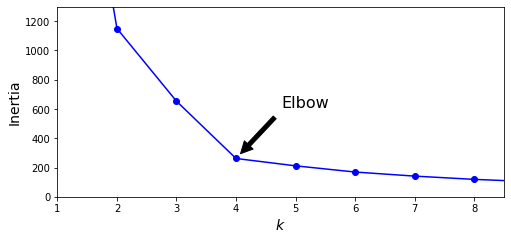

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

In [ ]:
# 클러스터 개수에 따라 실루엣 점수 비교
silhouette_scores = [silhouette_score(X,model.labels_) for model in kmeans_per_k[1:]]

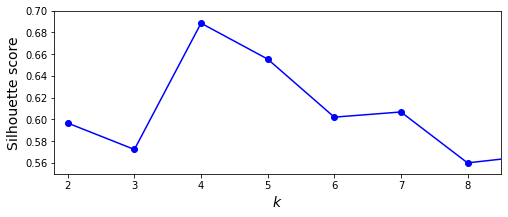

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()
# 클러스터가 4개일 때 최적

실루엣 다이어그램

- 높이는 클러스터가 포함하고 있는 샘플의 개수를 의미함.

- 너비는 클러스터에 포함된 샘플의 정렬된 실루엣 계수를 나타냄. 넓을수록 좋음.

- 수직 파선은 각 클러스터 개수에 해당하는 실루엣 점수를 나타냄.

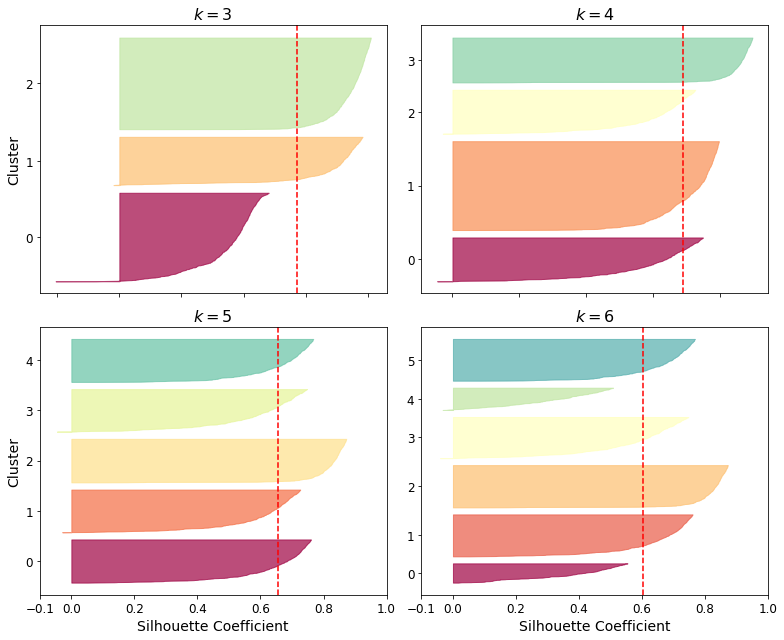

### 9.1.2 k-평균의 한계

k평균의 단점

- 최적이 아닌 솔루션을 피하려면 알고리즘을 여러 번 실행해야 함.

- 클러스터 개수를 지정해야 함.

- 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동하지 않음.

Tip) k-평균을 실행하기 전에 입력 특성의 스케일을 맞추는 것이 중요함. 그렇지 않으면 클러스터가 길쭉해지고 k-평균의 결과가 좋지 않음.

### 9.1.3 군집을 사용한 이미지 분할

- 이미지 분할: 이미지 세그먼트 여러 개로 분할하는 작업

- 시맨틱 분할: 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당됨. 

- 색상 분할: 동일한 색상을 가진 픽셀을 같은 세그먼트에 할당하는 것

In [ ]:
from matplotlib.image import imread
import os
image = imread(os.path.join("images","unsupervised learning", "ladybug.png"))
image.shape # (533, 800, 3) 

- 이미지는 3D배열로 표현됨.

- (높이, 너비, 컬러 채널 개수(RGB))

- 채널이 1개이면 흑백 이미지

- 투명도를 위해 알파 채널을 가진 이미지나 전자기파에 대한 채널을 포함하는 위성 이미지 등은 더 많은 채널을 가짐.

In [ ]:
# 배열을 RGB 색상의 긴 리스트로 변환한 다음 K-평균을 사용해 색상을 클러스터로 모음
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

- 배열을 RGB 색상의 긴 리스트로 변환한 다음 K-평균을 사용해 색상을 클러스터로 모음. 예시로, 초록색을 하나의 컬러 클러스터로 만듬.

- 각 색상에 대한 그 픽셀의 컬러 클러스터의 평균 컬러를 찾음.

- 이 긴 색상의 리스트를 원본 이미지와 동일한 크기로 바꿈.

- 클러스터 개수를 작게 하면 무당벌레의 화려한 빨간색이 독자적인 클러스터를 만들지 못하고 주변 색에 합쳐짐. 

>> k-평균이 비슷한 크기의 클러스터를 만드는 경향이 있기 때문

- 무당벌레는 이미지의 나머지 부분보다 훨씬 작기 때문에 화려한 색을 갖고 있더라도 k-평균이 무당벌레를 하나의 클러스터로 만들지 못함.

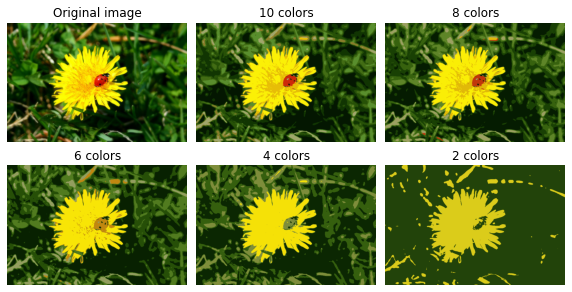

### 9.1.4 군집을 사용한 전처리

In [1]:
# 차원 축소에 군집을 사용하기
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y = True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [2]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [3]:
# 정확도
log_reg.score(X_test, y_test)

0.96

In [4]:
# k-평균을 전처리 단계로 사용해보기
# pipeline을 통해 훈련 세트를 50개의 클러스터로 모음.
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans",KMeans(n_clusters=50)),
    ("log_reg",LogisticRegression()),
])
pipeline.fit(X_train, y_train)
# 숫자가 10개이므로 클러스터 개수를 10개로 지정할 수도 있지만, 숫자를 쓴 방식이 다르기 때문에 클러스터 개수를 더 크게 하는 것이 좋음.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [5]:
pipeline.score(X_test, y_test)

0.9777777777777777

In [8]:
# 교차 검증을 통해 최적의 클러스터수 찾기
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters = range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=0)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 100)})

In [9]:
grid_clf.best_params_
# 클러스터수가 73개일때 정확도가 가장 크게 향상됨.

{'kmeans__n_clusters': 86}

In [10]:
grid_clf.score(X_test, y_test)

0.9755555555555555

### 9.1.5 군집을 사용한 준지도 학습

- 준지도 학습: 레이블이 없는 데이터가 많고 레이블이 있는 데이터는 적을 떄 사용함.

In [11]:
# 레이블된 50개 샘플에 로지스틱 회귀 모델 훈련
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression()

In [12]:
# 모델의 성능 평가
log_reg.score(X_test, y_test)
# 전체 데이터셋을 사용했을 때보다 정확도가 매우 낮음.

0.8844444444444445

In [13]:
# 훈련 세트를 50개의 클러스터로 모은 후 각 클러스터에서 센트로이드에 가까운 이미지(대표 이미지를 찾음.
import numpy as np
k=50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0) # 대표 이미지 인덱스
X_representative_digits = X_train[representative_digit_idx]

In [14]:
X_representative_digits

array([[ 0.,  0.,  5., ...,  8.,  0.,  0.],
       [ 0.,  0.,  2., ...,  5.,  0.,  0.],
       [ 0.,  0., 12., ...,  9.,  0.,  0.],
       ...,
       [ 0.,  0.,  8., ...,  6.,  0.,  0.],
       [ 0.,  0.,  8., ...,  8.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

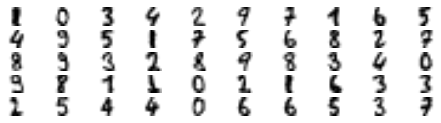

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [19]:
# 이미지로 수동 레이블 할당
y_representative_digits = np.array(
    [1,0,3,4,2,9,7,1,6,5,
     4,9,5,1,7,5,6,8,2,7,
     8,9,3,2,8,9,8,3,4,0,
     9,8,1,1,0,2,1,6,3,3,
     2,5,4,4,0,6,6,5,3,7
])
# 50개 대표이미지 데이터셋의 성능 확인
log_reg = LogisticRegression()
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9177777777777778

- 레이블 전파: 레이블을 동일한 클러스터에 있는 모든 샘플로 전파

In [20]:
# 각 대표 샘플의 레이블을 동일한 클러스터의 모든 샘플에 전파
# 클러스터 경계에 가깝게 위치한 샘플이 포함되어 있고 레이블이 잘못 부여되었을 수 있음.
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
  y_train_propagated[kmeans.labels_==i]=y_representative_digits[i]

In [21]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9088888888888889

In [34]:
# 센트로이드와 가까운 샘플의 20%만 레이블 전파
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
  in_cluster = (kmeans.labels_==i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist>cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist !=-1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train[partially_propagated]

In [35]:
# 레이블된 샘플 50개만으로 94%의 정확도를 얻음.
# 전파된 레이블이 매우 좋기 때문에 성능이 좋음.
log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9444444444444444

In [36]:
import numpy as np 
np.mean(y_train_partially_propagated == y_train[partially_propagated])

1.0

**능동학습** - 불확실성 샘플링

1. 지금까지 수집한 레이블된 샘플에서 모델을 훈련함. 이 모델을 사용해 레이블되지 않은 모든 샘플에 대한 예측을 만듬.

2. 모델이 가장 불확실하게 예측한 샘플(즉 추정 확률이 낮은 샘플)을 전문가에게 보내 레이블을 붙임.

3. 레이블을 부여하는 노력만큼의 성능이 향상되지 않을 때까지 이를 반복함.

- 다른 전략으로, 모델을 가장 크게 바꾸는 샘플이나 모델의 검증 점수를 가장 크게 떨어뜨리는 샘플, 여러 개의 모델이 동일한 예측을 내지 않는 샘플에 대해 레이블을 요청하는 것

### 9.1.6 DBSCAN

- 밀집된 연속적 지역을 클러스터로 정의함.

- 모든 클러스터가 충분히 밀집되어 있고 밀집되지 않은 지역과 잘 구분될 떄 좋은 성능을 냄.

작동방식

- 알고리즘이 각 샘플에서 작은 거리인 ε(입실론) 내에 샘플이 몇 개 놓여 있는지 세고, 이 지역을 샘플의 ε-이웃 이라고 부름.

- (자기 자신을 포함해) ε-이웃 내에 적어도 min_samples개 샘플이 있다면 이를 핵심 샘플(core instance)로 간주함. 즉, 핵심 샘플은 밀집된 지역에 있는 샘플임.

- 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속함. 이웃에는 다른 핵심 샘플이 포함될 수 있음. 따라서 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터를 형성함.

- 핵심 샘플이 아니고 이웃도 아닌 샘플은 이상치로 판단함.

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
# eps: 핵심 포인트를 중심으로 측정되는 유클리디언 거리값
dbscan.fit(X)

DBSCAN(eps=0.05)

In [39]:
dbscan.labels_
# 샘플의 클러스터 인덱스가 -1인 것은 이상치 

array([ 0,  1,  2,  3,  0,  4,  0,  0,  0,  5,  1,  5,  0,  6,  0,  5,  2,
        0,  0,  0,  0,  6,  6,  0,  4,  4,  0,  1,  0,  2,  0,  4,  6,  0,
        0,  2,  2,  8,  6,  7,  1,  5,  5,  3,  0,  3,  1,  0,  7,  0,  4,
        1,  4,  7,  7,  6,  1,  6,  0,  0,  1,  4,  0,  5,  0,  2,  0,  6,
       -1,  0,  0, -1,  1,  7,  8,  3, -1,  0,  0,  1,  6,  8,  1,  4,  5,
        0, -1,  5, -1,  0,  5,  0,  5,  4,  0,  0,  4,  5,  0,  5,  4,  0,
        2,  2,  0,  1,  1,  1,  0,  4,  4,  2,  8,  0,  1,  0,  1,  1,  6,
        0,  4,  4,  2,  5,  6,  4, -1,  2,  1,  1,  2,  8,  5,  3,  1,  0,
        1,  4,  4, -1,  0, -1,  0,  0,  8,  0,  1,  7,  0,  1,  0,  1,  3,
        2,  0,  1,  3,  5,  5,  4,  0,  1, -1,  6, -1,  4,  4,  4,  4,  7,
        4,  2,  0,  0,  0,  9,  4,  5, -1,  3,  4,  5,  2,  5,  6,  0,  1,
        5,  7,  0,  0,  5,  0,  0,  8,  5,  0,  3,  0,  1,  0,  6,  0,  1,
        2,  4,  6,  8,  0,  5,  5,  1,  5,  4,  1,  6,  1,  0,  6,  5,  6,
        0,  0,  3,  0,  5

In [42]:
len(dbscan.core_sample_indices_)

808

In [40]:
# 핵심 샘플의 인덱스
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   5,   6,   7,   9,  10,  11,  12,  15,  18,
        19,  20,  21,  22,  23,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  35,  36,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  51,  52,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        65,  66,  67,  69,  70,  72,  74,  75,  77,  78,  79,  80,  81,
        82,  83,  84,  87,  91,  92,  93,  94,  95,  96,  97,  99, 100,
       101, 102, 103, 104, 105, 107, 108, 109, 111, 112, 113, 114, 115,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130,
       131, 132, 133, 134, 136, 137, 138, 140, 142, 143, 145, 146, 147,
       149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160, 161, 163,
       165, 166, 167, 168, 169, 171, 172, 173, 174, 176, 179, 180, 182,
       183, 184, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 210, 211,
       212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 22

In [43]:
# 핵심 샘플 자체
dbscan.components_

array([[ 1.43852101, -0.43347229],
       [ 0.96287667,  0.36802612],
       [-0.92151285,  0.42998623],
       ...,
       [ 0.94051137,  0.41625754],
       [ 0.93493969,  0.1135914 ],
       [ 1.92909242,  0.17868642]])

- 군집 결과 클러스터 7개를 만들고 많은 샘플을 이상치로 판단함.

- eps를 0.2로 증가해 샘플의 이웃의 범위를 넓히면 완벽한 군집을 얻을 수 있음.

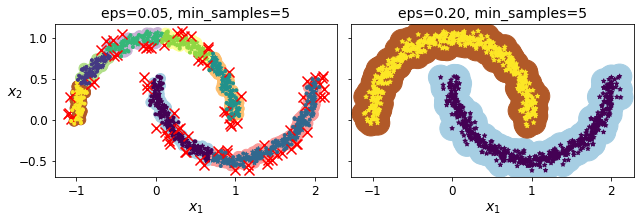

- DBSCAN은 predict() 메서드를 제공하지 않고 fit_predict() 메서드를 제공함. 즉, 이 알고리즘은 새로운 샘플에 대해 클러스터를 예측할 수 없음.

 > 사용자가 필요한 예측기를 선택해야 함.

In [44]:
# 핵심 샘플에서 훈련
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [45]:
# 예측
X_new = np.array([[-0.5,0],[0,0.5],[1,-0.1],[2,1]])
knn.predict(X_new)

array([2, 3, 1, 4])

In [46]:
knn.predict_proba(X_new)

array([[0.  , 0.  , 0.36, 0.28, 0.  , 0.  , 0.  , 0.36, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.96, 0.  , 0.  , 0.  , 0.  , 0.  , 0.04],
       [0.28, 0.72, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [48]:
# knn.kneighbors() 메서드에 샘플을 전달하면 훈련 세트에서 가장 가까운 k개 이웃의 거리와 인덱스를 반환
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist>0.2] = -1 # 0.2보다 거리가 먼 예측값들을 이상치로 판단
y_pred.ravel()

array([-1,  9,  1, -1])

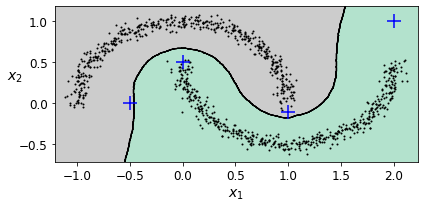

- DBSCAN은 클러스터의 모양과 개수에 상관없이 감지할 수 있는 능력이 있음.

- 이상치에 안정적이고 하이퍼파라미터가 2개(eps, min_samples)뿐임.

- 클러스터 간의 밀집도가 크게 다르면 모든 클러스터를 올바르게 잡아내는 것이 불가함.


### 9.1.7 다른 군집 알고리즘

**병합 군집**

- 샘플 하나로 시작하여 반복마다 인접한 클러스터 쌍을 연결함. 

- 병합된 클러스터 쌍을 트리로 모두 그리면 클러스터의 이진 트리를 얻을 수 있음. 이 트리의 리프는 개별 샘플임. 

- 대규모 샘플과 클러스터에 잘 확장되며 다양한 형태의 클러스터 감지 가능

**BIRCH**
 
 - 특별히 대규모 데이터셋을 위해 고안됨.

 - 특성 개수가 너무 많지 않다면(20개 이하) 배치 k-평균보다 빠르고 비슷한 결과를 만듬.

 - 훈련 과정에서 새로운 샘플을 클러스터에 빠르게 할당할 수 있는 정보를 담은 트리 구조를 만듬. 트리에 모든 샘플을 저장하지는 않음.

** 평균-이동**

- 각 샘플을 중심으로 하는 원을 그리고 원마다 포함된 모든 샘플의 평균을 구함.

- 원의 중심을 평균점으로 이동시킴. 

- 모든 원이 움직이지 않을 때까지 이 평균-이동을 계속함.

- 지역의 최대 밀도를 찾을 때까지 높은 쪽으로 원을 이동시킴.

- DBSCAN과 유사하게, 모양이나 개수에 상관없이 클러스터를 찾을 수 있고 하이퍼파라미터(bandwidth)도 매우 적음.

- DBSCAN과 달리, 클러스터 내부 밀집도가 불균형일 때 여러 개로 나누는 경향이 있음.

- 대규모 데이터셋에는 적절하지 않음.

**유사도 전파**

- 샘플은 자신을 대표할 수 있는 비슷한 샘플에 투표함.

- 알고리즘이 수렴하면 각 대표와 투표한 샘플이 클러스터를 형성함.

- 크기가 다른 여러 개의 클러스터 감지 가능

- 대규모 데이터셋에는 적절하지 않음.


** 스펙트럼 군집**

- 샘플 사이의 유사도 행렬을 받아 저차원 임베딩을 만듬. (차원 축소)

- 저차원 공간에서 또 다른 군집 알고리즘을 사용함.

- 복잡한 클러스터 구조를 감지하고 그래프 컷을 찾는데 사용할 수 있음.

- 샘플 개수가 많으면 잘 적용되지 않고 클러스터 크기가 매우 다르면 잘 작동하지 않음.



## 9.2 가우시안 혼합 (GMM)

**가우시안 혼합 모델(GMM)**

- 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델

- 하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터(일반적으로 타원형)를 형성함.

- 각 클러스터는 타원의 모양, 크기, 밀집도, 방향이 다름.

**GaussianMixture**

- GMM 변종

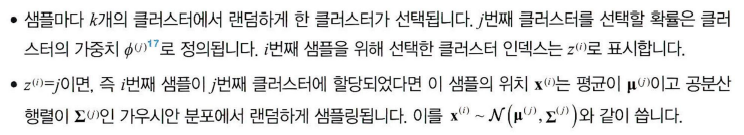

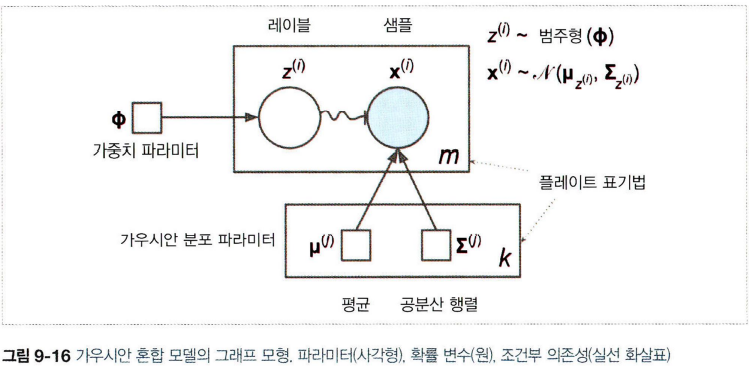

In [49]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [50]:
gm.weights_

array([0.20127992, 0.20344952, 0.59527056])

In [51]:
gm.means_

array([[-0.76129364,  0.55449392],
       [ 1.74272668, -0.05924586],
       [ 0.49467812,  0.25098763]])

In [52]:
gm.covariances_

array([[[ 0.04955357,  0.06011604],
        [ 0.06011604,  0.08739521]],

       [[ 0.05282433,  0.06187167],
        [ 0.06187167,  0.0892894 ]],

       [[ 0.17395553, -0.10530371],
        [-0.10530371,  0.28870259]]])

**기댓값-최대화 (EM) 알고리즘**

- GaussianMixture 클래스가 사용하는 알고리즘

- 클러스터 파라미터를 랜덤하게 초기화하고 수렴할 때까지 두 단계를 반복함.

  기댓값 단계: 샘플을 클러스터에 할당

  최대화 단계: 클러스터 업데이트

- 소프트 클러스터 할당을 사용함. (기댓값 단계에서 현재 클러스터 파라미터에 기반하여 각 클러스터에 속할 확률을 예측)

In [53]:
# 알고리즘의 수렴 여부
gm.converged_

True

In [54]:
# 알고리즘 반복 횟수
gm.n_iter_

15

In [55]:
# 하드 군집
gm.predict(X)

array([1, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0,
       1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1,
       1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 2, 2, 2,
       1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 2, 2,
       1, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2,
       0, 2, 2, 2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 0, 2,

In [56]:
# 소프트 군집
gm.predict_proba(X)

array([[2.90378221e-222, 9.25701252e-001, 7.42987484e-002],
       [7.75468267e-091, 1.20249429e-025, 1.00000000e+000],
       [9.99307966e-001, 5.59739955e-198, 6.92033665e-004],
       ...,
       [2.10477320e-106, 5.85312201e-019, 1.00000000e+000],
       [4.08547123e-231, 9.99590884e-001, 4.09115638e-004],
       [8.73584158e-001, 5.99942471e-185, 1.26415842e-001]])

- 가우시안 혼합 모델은 생성 모델임. (모델에서 새로운 샘플을 만들 수 있음.)

In [58]:
X_new, y_new = gm.sample(6)
print(X_new)
print(y_new)

[[-1.06499277  0.13877018]
 [ 2.06987102  0.45979289]
 [ 0.07328152  0.64113664]
 [ 0.86803332  0.15079559]
 [ 1.10938243  0.0753429 ]
 [ 1.42979624 -0.89868601]]
[0 1 2 2 2 2]


In [59]:
# score_samples(): 샘플의 위치의 확률밀도함수(PDF)의 로그를 예측. 점수가 높을수록 밀도가 높음.
gm.score_samples(X)
# 점수의 지숫값을 계산하면 샘플의 위치에서 PDF를 얻을 수 있음.
# 확률 밀도를 의미하므로, 샘플이 특정 지역 안에 속할 확률을 예측하려면 그 지역에 대해 PDF를 적분해야 함.

array([-7.25526684e-01, -1.72273515e+00, -2.47612904e-01, -1.77290337e+00,
       -1.85306309e+00, -1.06255994e+00, -1.11716437e+00, -1.52164745e+00,
       -2.09873474e+00, -1.67870241e+00, -1.49758244e+00, -1.63427422e+00,
       -1.41581843e+00, -1.45687856e+00, -2.28627295e+00, -1.80445494e+00,
       -1.06745676e+00, -1.76609420e+00, -1.61201576e+00, -1.53180290e+00,
       -1.41970692e+00, -2.30330635e+00, -7.24178174e-01, -1.41950678e+00,
       -5.54806720e-01, -3.69334858e-01, -4.47709015e-01, -1.68441805e+00,
       -2.21305230e+00, -3.26602496e-01, -1.72228547e+00, -1.05870962e+00,
       -6.42472870e-01, -1.50656774e+00, -1.73877274e+00, -6.47603288e-01,
       -7.43318180e-02, -6.14399282e-01, -2.62573233e-01, -1.41853450e+00,
       -1.53924465e+00, -1.87296660e+00, -1.87958045e+00, -1.53033007e+00,
       -4.18438344e-01, -1.61747473e+00, -1.77868509e+00, -1.64999889e+00,
       -1.90529341e+00, -1.63111232e+00, -7.71805021e-01, -1.70758675e+00,
        6.99666488e-02, -

훈련된 가우시안 혼합 모델의 클러스터 평균, 결정 경계, 밀도 등고선

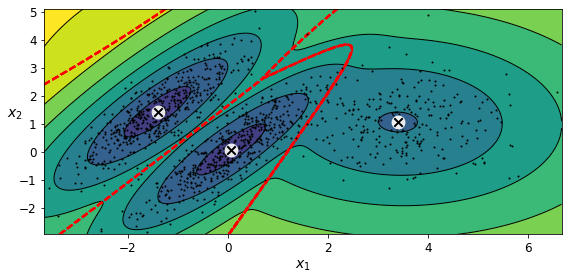

EM이 최적의 솔루션으로 수렴하기 위해 알고리즘이 학습할 파라미터 개수를 제한함.

covariance_type 매개변수

- 'sphereical': 모든 클러스터가 원형

- 'diag': 클러스터는 크기에 상관없이 어떤 타원형도 가능. 하지만 타원의 축은 좌표 축과 나란해야 함.

- 'tied': 모든 클러스터가 동일한 타원 모양, 크기, 방향을 가짐. 즉, 모든 클러스터가 동일한 공분산 행렬을 공유함.)

- 'full'(default): 각 클러스터는 모양, 크기, 방향에 제약이 없음.

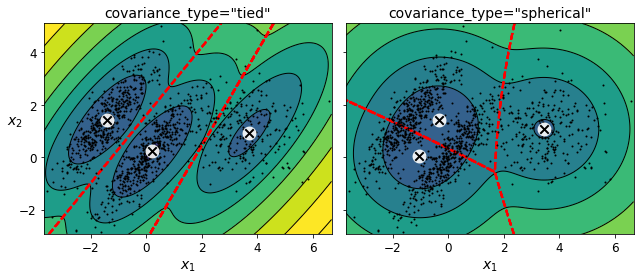

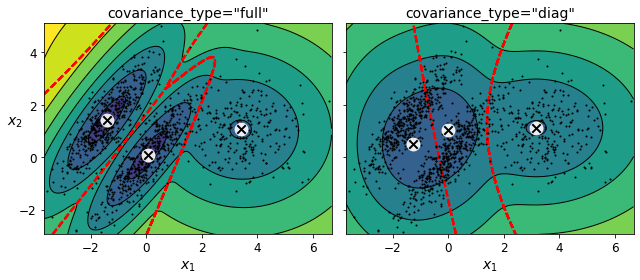

### 9.2.1 가우시안 혼합을 사용한 이상치 탐지

**이상치 탐지**

- 부정 거래 감지, 제조 결함이 있는 제품 감지, 다른 모델을 훈련하기 전에 데이터셋에서 이상치를 제거하기 등에 사용

- 가우시안 혼합 모델을 이상치 탐지에 사용하면, 밀도 임곗값보다 낮은 지역에 있는 모든 샘플을 이상치로 간주함.

In [60]:
# 4%를 밀도 임곗값으로 사용하여 이상치 구분하기
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities<density_threshold]

가우시안 혼합 모델을 사용한 이상치(별 모양) 탐지

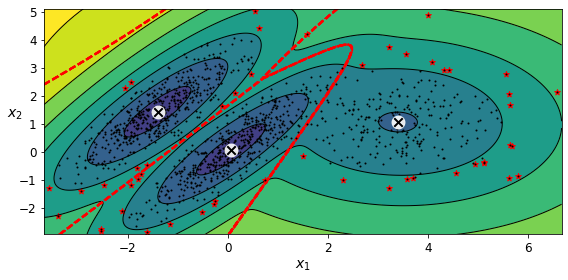

- 특이치 탐지는 이상치로 오염되지 않은 깨끗한 데이터셋에서 훈련

- 이상치 탐지는 데이터셋을 정제하는데 자주 사용됨.

Tip) 가우시안 혼합 모델은 이상치를 포함해 모든 데이터에 맞추려고 하여 이상치가 너무 많으면 모델이 정상치를 바라보는 시각이 편향되고 일부 이상치를 정상으로 잘못 생각할 수 있음. 따라서, 먼저 한 모델을 훈련하고 가장 크게 벗어난 이상치를 제거하고 정제된 데이터셋에서 모델을 다시 훈련함. 다른 방법으로는 안정적인 공분산 추정 방법을 사용

### 9.2.2 클러스터 개수 선택하기

이너셔나 실루엣 점수는 모두 원형 클러스터를 가정하기 때문에 가우시안 혼합 모델에 사용할 수 없음. 대신 BIC(Bayesian Information Criterion)나 AIC(Akaike Information Criterion) 같은 이론적 정보 기준을 최소화하는 모델을 찾을 수 있음.

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$은 샘플의 개수
* $p$는 모델이 학습할 파라미터 개수
* $\hat L$은 모델의 가능도 함수의 최댓값. 이는 모델과 최적의 파라미터가 주어졌을 때 관측 데이터 $\mathbf{X}$의 조건부 확률

BIC와 AIC 모두 모델이 많은 파라미터(예를 들면 많은 클러스터)를 학습하지 못하도록 벌칙을 가하고, 데이터에 잘 맞는 모델(즉, 관측 데이터에 가능도가 높은 모델)에 보상을 줌.

BIC와 AIC가 다른 모델을 선택한다면, BIC가 선택한 모델이 AIC가 선택한 모델보다 간단한(파라미터가 적은) 경향이 있음. 하지만, 대규모 데이터셋에서 데이터에 아주 잘 맞지 않을 수 있음.

- 확률: 파라미터 θ인 확률 모델이 주어지면 확률은 미래 출력 x가 얼마나 그럴듯한지 설명

- 가능도: 출력x를 알고 있을 때 특정 파라미터 θ가 얼마나 그럴듯한지 설명

> PDF는 x의 함수 (θ 고정). 적분 시 1이 됨.

> 가능도 함수는 θ의 함수 (x고정)

In [62]:
# BIC
gm.bic(X)

2761.6354195719155

In [63]:
# AIC
gm.aic(X)

2678.203579829219

클러스터가 3개일 때 최적

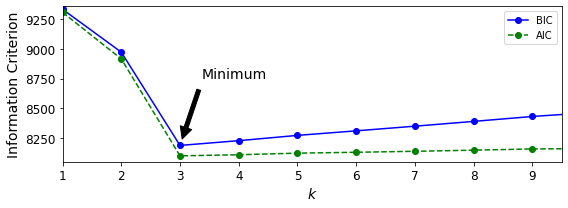

### 9.2.3 베이즈 가우시안 혼합 모델

- BayesianGaussianMixture: 최적의 클러스터 수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만듬.

In [64]:
# 자동으로 불필요한 클러스터 제거
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_,2)
# 알고리즘이 클러스터 개수 감지

array([0.16, 0.1 , 0.13, 0.13, 0.11, 0.17, 0.09, 0.1 , 0.  , 0.  ])

- 베타 분포: 고정 범위 안에 놓인 값을 가진 확률 변수를 모델링할 때 자주 사용됨.

- 새로운 샘플이 작은 클러스터보다 큰 클러스터에 합류할 가능성이 높은 데이터셋에 맞는 모델

베이즈 가우시안 혼합 모델

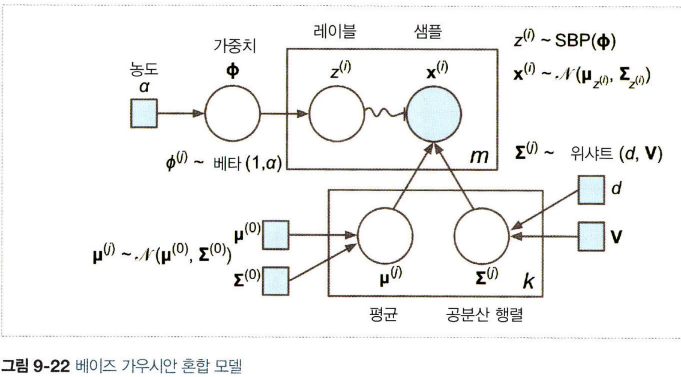

- 가우시안 혼합 모델은 타원형 클러스터에 잘 작동

- 다른 모양을 가진 데이터셋에 훈련 시, 나쁜 결과를 얻음

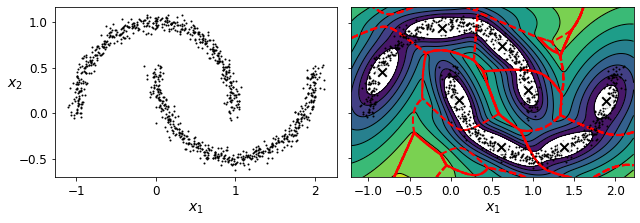

### 9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘

**PCA(그리고 inverse_transform 메서드를 가진 다른 차원 축소기법)**

- 보통 샘플의 재구성 오차와 이상치의 재구성 오차를 비교하면 일반적으로 후자가 훨씬 큼. 이는 간단하고 종종 매우 효과적인 이상치 탐지 기법임.

**Fast-MCD**

-EllipticEnvelope 클래스에서 구현된 알고리즘
- 특히 데이터셋을 정제할 때 사용

- 보통 정상치가 하나의 가우시안 분포에서 생성되었다고 가정하고 이 가우시안 분포에서 생성되지 않은 이상치로 이 데이터셋이 오염되었다고 가정함.

- 가우시안 분포의 파라미터를 추정할 때 이상치로 의심되는 샘플 무시함.

**아이솔레이션 포레스트**

- 고차원 데이터셋에서 이상치 감지

- 무작위로 성장한 결정 트리로 구성된 랜덤포레스트를 만들고 각 노드에서 특성을 랜덤하게 선택한 다음 랜덤한 임곗값을 골라 데이터셋을 둘로 나눔. 데이터셋이 점차 분리되어 모든 샘플이 다른 샘플과 격리될 때까지 진행. 이상치는 일반적으로 다른 샘플과 멀리 떨어져 있으므로 평균적으로 정상 샘플과 적은 단계에서 격리

**LOF**
- 주어진 샘플 주위의 밀도와 이웃 주위의 밀도 비교

**one-class SVM**
- 특이치 탐지에 잘 맞음.

- 고차원 데이터셋에 잘 작동함.

- 대규모 데이터셋으로의 확장은 어려움.